In [15]:
!pip install mlxtend

In [51]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt


In [52]:
movie=pd.read_csv('my_movies.csv')
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [53]:
movie=movie.drop(['V1','V2','V3','V4','V5'], axis=1)
movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [54]:
movie.shape

(10, 10)

#Apriori Algorithms

####If support value is 0.2 and threshold is 0.6.


In [55]:
frequent_itemsets = apriori(movie, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [56]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.6)
rules
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
14,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


In [57]:
rules[rules.lift>1]
#(Green Mile)	(Sixth Sense)	,
#(Patriot)	(Gladiator) ,
#(LOTR2)	(LOTR1) ,
#(LOTR1)	(LOTR2) ,
#(Patriot, Sixth Sense)	(Gladiator)   are all at high cofidence at 100%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [58]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
14,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


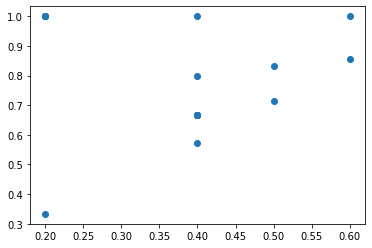

In [59]:
plt.scatter('support','confidence',data=rules)

###If support value is 0.5 and threshold is 1.

In [65]:
frequent_itemsets = apriori(movie, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Gladiator, Patriot)"


In [66]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules1
rules1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


In [67]:
rules1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


In [68]:
rules1[rules.lift>1]
#(Patriot)	(Gladiator) are high confidence at 100%.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


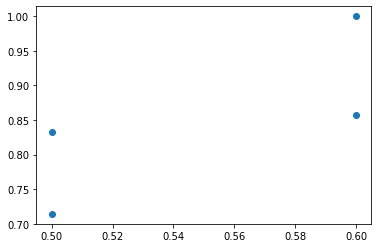

In [70]:
plt.scatter('support','confidence',data=rules1)

#Inference

If support vule is 0.2 and threshold is 0.6 then(Green Mile)	(Sixth Sense)	,
(Patriot)	(Gladiator) ,(LOTR2)	(LOTR1) ,(LOTR1)	(LOTR2) ,(Patriot, Sixth Sense)	(Gladiator)   are all at 100% confidence.


If support value is 0.5 and threshold is 1 then (Patriot)	(Gladiator) are at the 100% confidence.